In [34]:
import pandas as pd 
import os

In [35]:
folder_path = r"C:\Users\nagad\OneDrive\Desktop\dataproject\SalesAnalysis\Sales_Data"


# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]


# Initialize an empty list to store DataFrames
dfs = []


# Iterate through each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    data = pd.read_csv(file_path)
    dfs.append(data)

# Concatenate the list of DataFrames into a single DataFrame
merged_data = pd.concat(dfs, ignore_index=True)

# Save the concatenated DataFrame to a new CSV file
output_csv_path = 'merged_data.csv'
merged_data.to_csv(output_csv_path, index=False)

print(f"Concatenated data saved to: {output_csv_path}") 

Concatenated data saved to: merged_data.csv


In [36]:
all_data = pd.read_csv("merged_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [37]:
all_data.shape

(186850, 6)

In [38]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


#### cleanup the data

In [39]:
all_data.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [40]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### get rid of text in order date column

In [41]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Make columns correct type

In [42]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#### Augment data with additional columns

#### add month coloum

In [43]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### we can also add month - 

In [44]:
all_data['Month 2'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')

print(all_data.head())

  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   

              Month 2  
0 2019-04-19 08:46:00  
2 2019-04-07 22:30:00  
3 2019-04-12 14:38:00  
4 2019-04-12 14:38:00  
5 2019-04-30 09:27:00  


#### Add city column

In [45]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2019-04-19 08:46:00,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,2019-04-07 22:30:00,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019-04-12 14:38:00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019-04-12 14:38:00,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,2019-04-30 09:27:00,Los Angeles (CA)


#### Data Exploration!

#### What was the best month for sales? How much was earned that month?

In [46]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [47]:
sales_by_month = all_data.groupby(all_data['Month']).agg({'Sales': 'sum'})
print(sales_by_month)

            Sales
Month            
1      1822256.73
2      2202022.42
3      2807100.38
4      3390670.24
5      3152606.75
6      2577802.26
7      2647775.76
8      2244467.88
9      2097560.13
10     3736726.88
11     3199603.20
12     4613443.34


C:\Users\nagad\AppData\Local\Temp\ipykernel_28624\888002484.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')


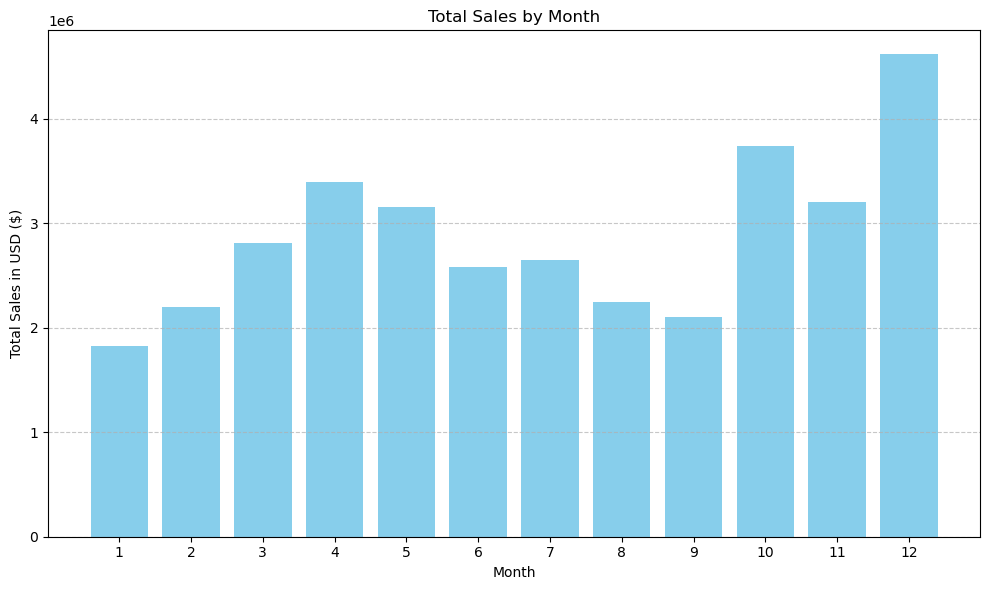

In [48]:
# print(all_data['Order Date'].dtypes)

# Convert 'Order Date' to datetime — invalid entries become NaT
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')

# Drop rows with invalid or missing 'Order Date'
all_data = all_data.dropna(subset=['Order Date'])

# Convert 'Sales' to numeric in case it's a string (remove non-numeric entries if needed)
all_data['Sales'] = pd.to_numeric(all_data['Sales'], errors='coerce')

# Drop rows with missing or invalid 'Sales' values
all_data = all_data.dropna(subset=['Sales'])

# ✅ Now plot total sales by month

# Group by month and sum the sales
monthly_sales = all_data.groupby(all_data['Order Date'].dt.month)['Sales'].sum()

# 📊 Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales.index, monthly_sales, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Sales in USD ($)')
plt.title('Total Sales by Month')
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### What city sold the most product?

In [49]:
city_sales = all_data.groupby('City')['Sales'].sum()
print(city_sales)

City
Atlanta  (GA)          2795498.58
Austin  (TX)           1819581.75
Boston  (MA)           3661642.01
Dallas  (TX)           2767975.40
Los Angeles  (CA)      5452570.80
New York City  (NY)    4664317.43
Portland  (ME)          449758.27
Portland  (OR)         1870732.34
San Francisco  (CA)    8262203.91
Seattle  (WA)          2747755.48
Name: Sales, dtype: float64


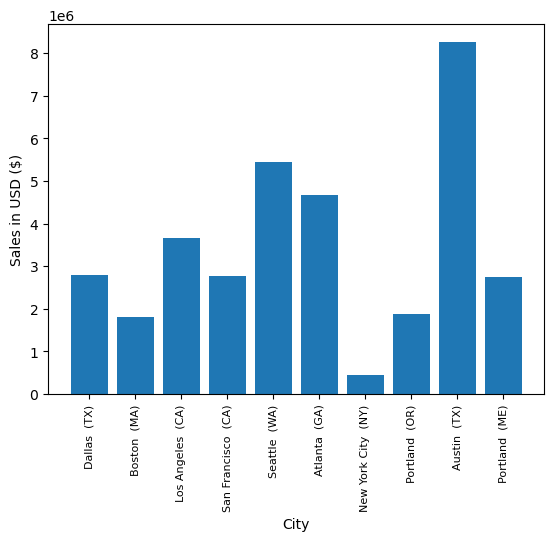

In [50]:
# Assuming 'all_data' is your DataFrame and 'City' is one of its columns

# Get unique city names
keys = all_data['City'].unique()

# Calculate sum of sales for each city
sales_by_city = all_data.groupby('City')['Sales'].sum()

# Plot the data
plt.bar(keys, sales_by_city)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.xticks(rotation='vertical', size=8)
plt.show()


#### What time should we display advertisements to maximize likelihood of customer's buying product?

In [51]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019-04-19 08:46:00,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019-04-07 22:30:00,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019-04-12 14:38:00,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019-04-12 14:38:00,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019-04-30 09:27:00,Los Angeles (CA),11.99,9,27,1


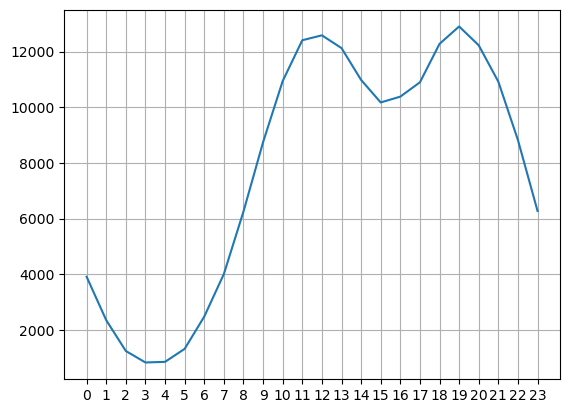

In [52]:
import matplotlib.pyplot as plt

keys = [pair for pair, df in all_data.groupby(['Hour'])]

# Flatten the list of lists
keys = [item for sublist in keys for item in sublist]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()


#### What products are most often sold together

In [53]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\nagad\AppData\Local\Temp\ipykernel_28624\3593477360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [54]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most? Why do you think it sold the most?

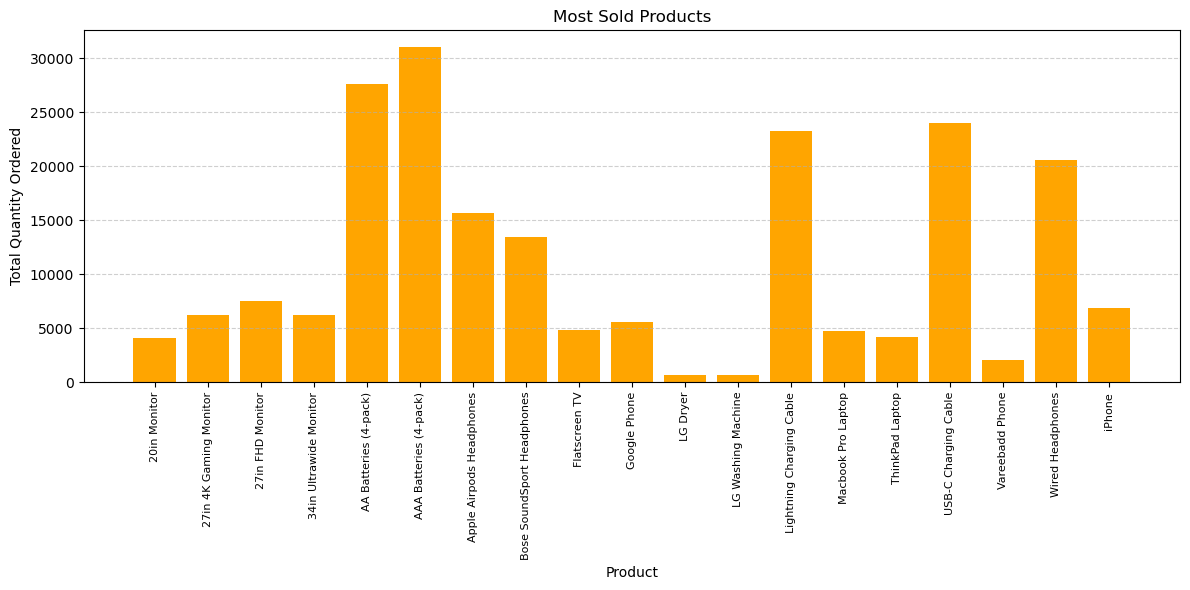

In [55]:
import matplotlib.pyplot as plt

# ✅ Group by Product and sum Quantity Ordered
product_group = all_data.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()

# ✅ Get product names (keys)
product_names = quantity_ordered.index

# ✅ Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(product_names, quantity_ordered, color='orange')
plt.xticks(product_names, rotation='vertical', size=8)
plt.xlabel('Product')
plt.ylabel('Total Quantity Ordered')
plt.title('Most Sold Products')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


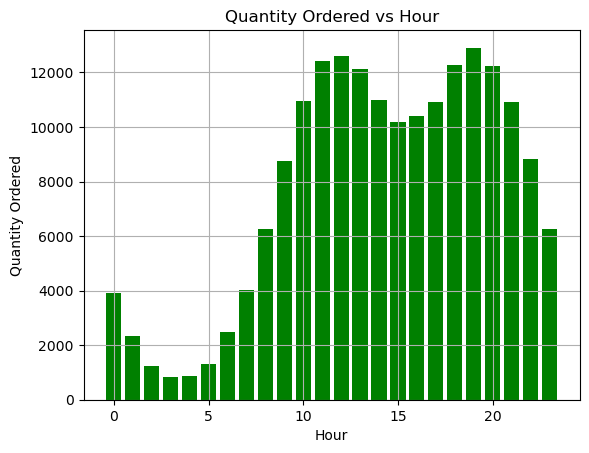

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the date column to datetime format
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

# Extract the hour from the datetime column
all_data['Hour'] = all_data['Order Date'].dt.hour

# Group by the hour and calculate the quantity ordered
quantity_ordered = all_data.groupby('Hour').size()

# Plot the data
plt.bar(quantity_ordered.index, quantity_ordered.values, color='g')
plt.xlabel('Hour')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered vs Hour')
plt.grid(True)
plt.show()



How do sales fluctuate daily or hourly?

Extract time from Order Date.

Analyze order count/sales per hour.

Ideal for determining when to increase staff or promotions.

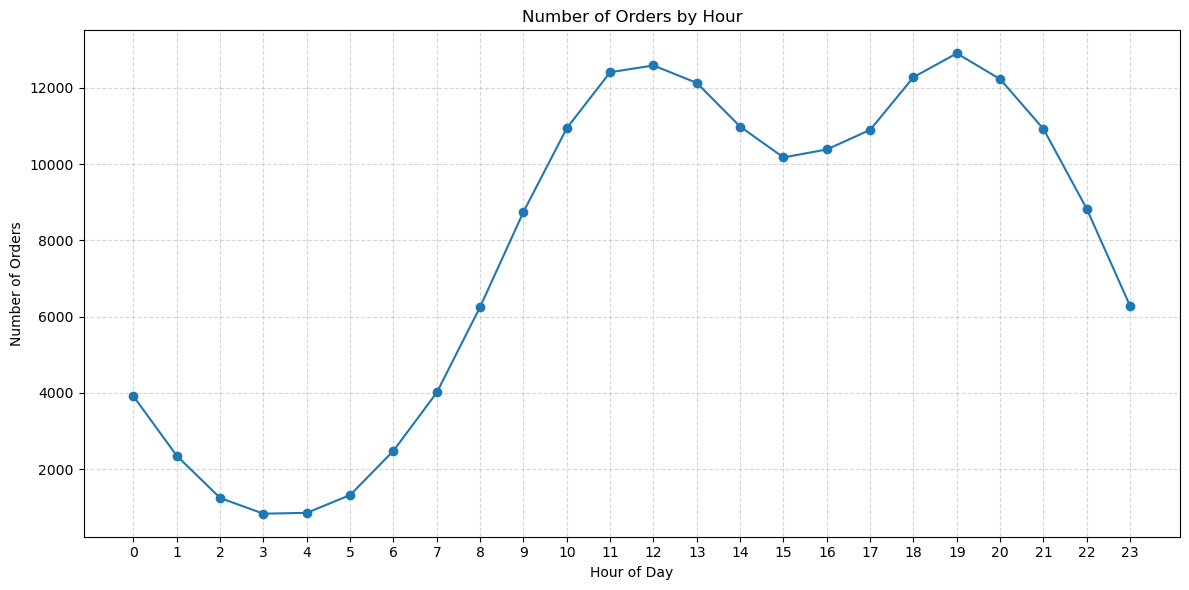

In [57]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')

# 📌 Remove NaN values if any
all_data = all_data.dropna(subset=['Order Date'])

# 📌 Extract hour from 'Order Date'
all_data['Hour'] = all_data['Order Date'].dt.hour

# 📌 Group by Hour and count number of orders
orders_per_hour = all_data.groupby('Hour').count()['Order ID']

# 📊 Plot the data
plt.figure(figsize=(12,6))
plt.plot(orders_per_hour.index, orders_per_hour.values, marker='o')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(0,24))
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour')
plt.tight_layout()
plt.show()

Which products generated the highest revenue?

Calculate Quantity Ordered * Price Each as Sales.

Group by Product and sum Sales.

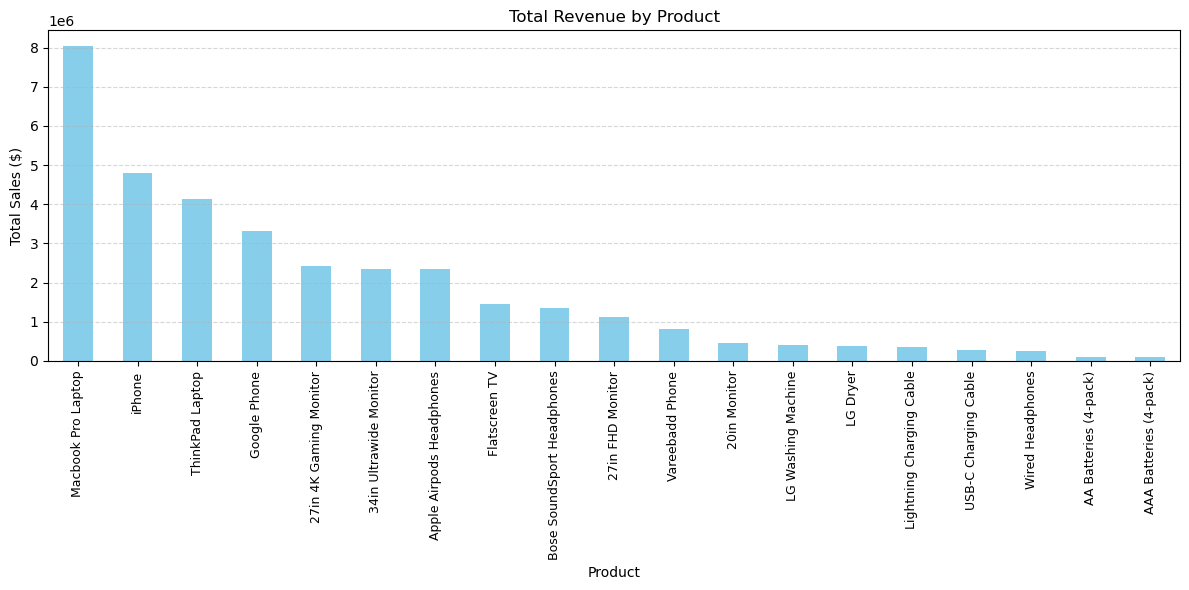

In [58]:
# 📌 Convert data types
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# 📌 Drop any NaN values after conversion
all_data = all_data.dropna(subset=['Quantity Ordered', 'Price Each'])

# 📌 Create a 'Sales' column (Revenue)
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

# 📌 Group by 'Product' and sum 'Sales'
product_sales = all_data.groupby('Product').sum(numeric_only=True)['Sales']

# 📊 Plot the data
plt.figure(figsize=(12,6))
product_sales.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Product')
plt.ylabel('Total Sales ($)')
plt.xlabel('Product')
plt.xticks(rotation='vertical', fontsize=9)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

What’s the average order value per city?

Group by city, sum total Sales, divide by number of unique orders.

How many unique products are sold?

Use nunique() on Product column.

Which address had the highest purchase?

Group by Purchase Address and sum Sales.

In [59]:
# Convert Quantity Ordered and Price Each to numeric
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# Drop rows with NaN values in Quantity or Price
all_data = all_data.dropna(subset=['Quantity Ordered', 'Price Each'])

# Calculate Sales column
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

# Extract City from Purchase Address (assumes format like "123 Main St, Boston, MA 02215")
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1].strip())

# Group by City: sum Sales and count unique orders (Order ID)
city_sales = all_data.groupby('City').agg({'Sales': 'sum', 'Order ID': pd.Series.nunique})

# Calculate average order value per city
city_sales['Average Order Value'] = city_sales['Sales'] / city_sales['Order ID']

print(city_sales[['Average Order Value']])

               Average Order Value
City                              
Atlanta                 196.134048
Austin                  191.353639
Boston                  191.789336
Dallas                  194.380295
Los Angeles             191.331700
New York City           195.585266
Portland                193.697046
San Francisco           192.601145
Seattle                 194.614029


In [60]:
# Count unique products
unique_products_count = all_data['Product'].nunique()

print(f"Number of unique products sold: {unique_products_count}")


Number of unique products sold: 19


In [62]:
# Group by Purchase Address and sum Sales
address_sales = all_data.groupby('Purchase Address').sum(numeric_only=True)['Sales']

# Find address with max sales
highest_purchase_address = address_sales.idxmax()
highest_purchase_value = address_sales.max()

print(f"Address with highest purchase: {highest_purchase_address}")
print(f"Total Sales at this address: ${highest_purchase_value:.2f}")


Address with highest purchase: 668 Park St, San Francisco, CA 94016
Total Sales at this address: $4379.99


## Conclusion

This sales data analysis provided valuable insights into customer purchasing behavior and business performance across multiple dimensions. By aggregating and cleaning the data from various sales records, we were able to:

* Identify **key revenue-driving products**, which allows for focused inventory and marketing strategies to maximize profit.
* Analyze **sales trends by hour and month**, revealing peak shopping times that can guide staffing and promotional efforts.
* Calculate the **average order value across cities**, highlighting regional differences that can inform targeted pricing and campaigns.
* Discover the **purchase hotspots** by address, enabling personalized customer engagement and localized marketing.
* Understand product diversity through the count of **unique products sold**, aiding product portfolio decisions.

These insights equip the business with actionable data to optimize operations, improve customer experience, and boost overall sales performance. Future analysis could incorporate customer segmentation and predictive modeling to further enhance strategic decision-making.

---